<a href="https://colab.research.google.com/github/Dalia65/machine-learning-loan-prediction/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns
import sklearn.cluster          as cluster
import sklearn.metrics          as metrics
from sklearn.neighbors          import KNeighborsClassifier
from sklearn                    import ensemble
from   sklearn                  import svm
from sklearn.ensemble           import VotingClassifier
from sklearn.svm                import SVC
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.linear_model       import LogisticRegression
from sklearn.metrics            import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing      import LabelEncoder

# New section

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Loan Prediction - Loan Prediction.csv")
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

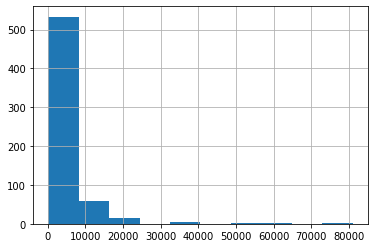

In [ ]:
df["ApplicantIncome"].hist()

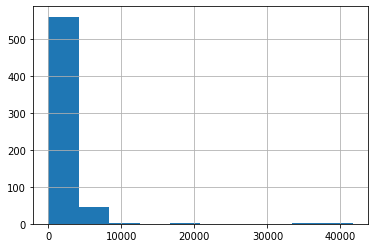

In [ ]:
df["CoapplicantIncome"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


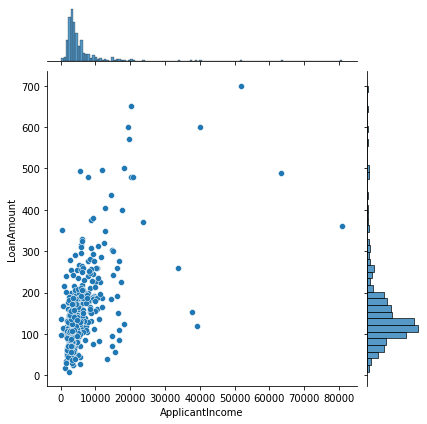

In [ ]:
sns.jointplot('ApplicantIncome','LoanAmount',data=df,kind='scatter')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
  corr= df.corr()
  print("The Correlation Between Features are:    ")
  print(df.corr())

The Correlation Between Features are:    
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


In [ ]:
df.drop(['Loan_ID'] ,axis=1,inplace=True)
#df.dropna(subset=['Gender'], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
#df.dropna(subset=['Married'], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


df.dropna(subset=['Self_Employed'], inplace=True)
#df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
#df.fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
#df.fillna(df['Credit_History'].mode())

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoded_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']
labelencoder_X = LabelEncoder()
for col in encoded_columns:
    df[col] = labelencoder_X.fit_transform(df[col])

In [ ]:
  x = df.drop(columns=['Loan_Status'])
  y = df['Loan_Status']

In [ ]:
x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 1, shuffle = True)
x_train.shape, X_test.shape, y_train.shape, Y_test.shape

((436, 11), (146, 11), (436,), (146,))

In [ ]:
df["Loan_Status"] = df["Loan_Status"].map({"N": 0, "Y": 1})
df["Gender"] = df["Gender"].map({"Male": 0 ,"Female": 1})
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1, "Semiurban": 2})


In [ ]:

df['Dependents'] = pd.to_numeric(df['Dependents'],errors = 'coerce')
df['Dependents'] = df['Dependents'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             0 non-null      float64
 1   Married            0 non-null      float64
 2   Dependents         582 non-null    float64
 3   Education          0 non-null      float64
 4   Self_Employed      0 non-null      float64
 5   ApplicantIncome    582 non-null    int64  
 6   CoapplicantIncome  582 non-null    float64
 7   LoanAmount         582 non-null    float64
 8   Loan_Amount_Term   582 non-null    float64
 9   Credit_History     582 non-null    float64
 10  Property_Area      0 non-null      float64
 11  Loan_Status        0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 59.1 KB


In [ ]:
  llf = LogisticRegression()
  llf.fit(x_train,y_train)
  #y_pred= llf.predict(X_test)
  #accuracy = accuracy_score(Y_test,y_pred)
  #accuracy
print(llf.predict(X_test))
accuracy = accuracy_score(Y_test,y_pred)
accuracy

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8287671232876712

In [ ]:
   rf =ensemble.RandomForestClassifier(n_estimators=300)
   rf.fit(x_train, y_train)
   y_pred= rf.predict(X_test)
   accuracy = accuracy_score(Y_test,y_pred)
   accuracy

0.8287671232876712

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train, y_train)
print(knn.predict(X_test))
accuracy = accuracy_score(Y_test,y_pred)
accuracy

[1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


0.8287671232876712

In [ ]:
  from sklearn.naive_bayes        import GaussianNB
  gnb = GaussianNB()
  gnb.fit(x_train, y_train)
  y_pred= gnb.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  accuracy

0.8287671232876712

In [ ]:
class Input:
     def input(self , infile,model):
        df=pd.read_csv(infile)
        df.drop(['Loan_ID'] ,axis=1,inplace=True)
        #df.dropna(subset=['Gender'], inplace=True)
        df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
        df['Married'].fillna(df['Married'].mode()[0], inplace=True)
        #df.dropna(subset=['Married'], inplace=True)
        df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

        df.dropna(subset=['Self_Employed'], inplace=True)
        #df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

        df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
        #df.fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
        df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
        df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
        #df.fillna(df['Credit_History'].mode())
        from sklearn.preprocessing import LabelEncoder
        encoded_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']
        labelencoder_X = LabelEncoder()
        for col in encoded_columns:
          df[col] = labelencoder_X.fit_transform(df[col])
        
        mydata = df.drop(columns=['Loan_Status'])
        y_pred= model.predict(mydata)
        return mydata,y_pred

In [ ]:
#VotingClassifierModel = VotingClassifier(estimators=[('llf',llf),('rf',rf),('gnb',gnb)], voting='hard')
#VotingClassifierModel.fit(x_train,y_train)
#myprediction = VotingClassifierModel.predict(X_test)
#print (myprediction)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
infile="/content/testdata.csv"

In [ ]:
inobj=Input()

mydata,randomforestprediction=inobj.input(infile,rf)
#mydata,naiveprediction=inobj.input(infile,gnb)
#mydata,logosticprediction=inobj.input(infile,llf)
#mydata,knnmodel=inobj.input(infile,knn)

#print(logosticprediction)
#print(knnmodel)
print(randomforestprediction)
#print(naiveprediction)

[1 0 1 1 1]
